In [ ]:
import os

In [ ]:
import pandas

In [ ]:
dfAdj = pandas.read_table("karate.txt",header=0,index_col=0)

In [ ]:
n = dfAdj.shape[0]

In [ ]:
print(n)

34


In [ ]:
print(dfAdj.info())

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, p1 to p34
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   p1      34 non-null     int64
 1   p2      34 non-null     int64
 2   p3      34 non-null     int64
 3   p4      34 non-null     int64
 4   p5      34 non-null     int64
 5   p6      34 non-null     int64
 6   p7      34 non-null     int64
 7   p8      34 non-null     int64
 8   p9      34 non-null     int64
 9   p10     34 non-null     int64
 10  p11     34 non-null     int64
 11  p12     34 non-null     int64
 12  p13     34 non-null     int64
 13  p14     34 non-null     int64
 14  p15     34 non-null     int64
 15  p16     34 non-null     int64
 16  p17     34 non-null     int64
 17  p18     34 non-null     int64
 18  p19     34 non-null     int64
 19  p20     34 non-null     int64
 20  p21     34 non-null     int64
 21  p22     34 non-null     int64
 22  p23     34 non-null     int64
 23  p24     34 non-null 

In [ ]:
print(dfAdj.index)


Index(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11',
       'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21',
       'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28', 'p29', 'p30', 'p31',
       'p32', 'p33', 'p34'],
      dtype='object', name='Personnes')


In [ ]:
MAdj = dfAdj.values

In [ ]:
print(MAdj)

[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


In [ ]:
!pip install igraph 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import igraph

In [ ]:
print(igraph.__version__)

0.10.3


In [ ]:
g = igraph.Graph.Adjacency(MAdj.tolist(),mode=igraph.ADJ_UNDIRECTED)

In [ ]:
print(g)

IGRAPH U--- 34 78 --
+ edges:
 0 --  1  2  3  4  5  6  7  8 10 11 12 13 17 19 21 31      25 -- 23 24 31
 1 --  0  2  3  7 13 17 19 21 30                           26 -- 29 33
 2 --  0  1  3  7  8  9 13 27 28 32                        27 --  2 23 24 33
 3 --  0  1  2  7 12 13                                    28 --  2 31 33
 4 --  0  6 10                                             29 -- 23 26 32 33
 5 --  0  6 10 16                                          30 --  1  8 32 33
 6 --  0  4  5 16                                          31 --  0 24 25 28
32 33
 7 --  0  1  2  3                                          32 --  2  8 14 15
18 20 22 23 29 30 31 33
 8 --  0  2 30 32 33                                       33 --  8  9 13 14
15 18 19 20 22 23 26 27 28 29 30 31 32
 9 --  2 33
10 --  0  4  5
11 --  0
12 --  0  3
13 --  0  1  2  3 33
14 -- 32 33
15 -- 32 33
16 --  5  6
17 --  0  1
18 -- 32 33
19 --  0  1 33
20 -- 32 33
21 --  0  1
22 -- 32 33
23 -- 25 27 29 32 33
24 -- 25 27 31


In [ ]:
g.vs["name"] = dfAdj.index.tolist()

In [ ]:
print(g.vs[10]["name"])

p11


In [ ]:
print(g.neighborhood_size("p11"))

4


In [ ]:
print(g.neighborhood("p11"))

[10, 0, 4, 5]


In [ ]:
print(g.vs[g.neighborhood("p11")]['name'])

['p11', 'p1', 'p5', 'p6']


In [ ]:
g.vs['label'] = dfAdj.index.tolist()

In [ ]:
print(g.vs[0]['label'])

p1


In [ ]:
obj = igraph.plot(g,vertex_label_size=15,vertex_size=35,vertex_color='#ffe4c4')

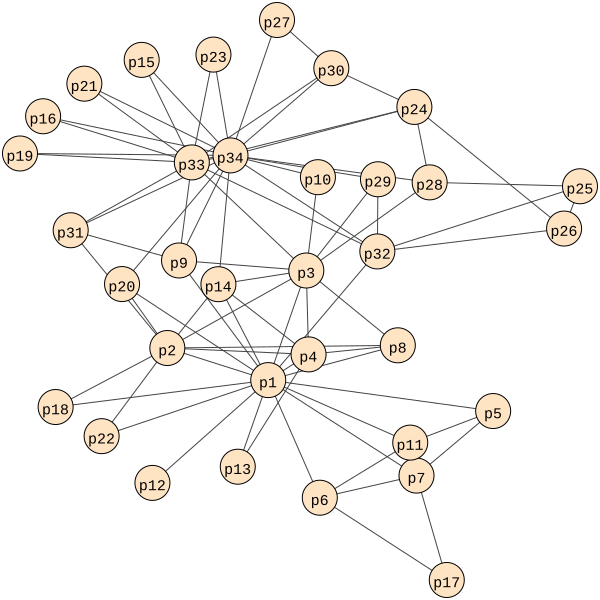

In [ ]:
obj

In [ ]:
print(g.vs.degree())

[16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]


In [ ]:
valeurs = {'node_name':g.vs['name'],'degree':g.vs.degree()}

In [ ]:
print(pandas.DataFrame.from_dict(valeurs).sort_values(by='degree',ascending=False).iloc[:5,:])


   node_name  degree
33       p34      17
0         p1      16
32       p33      12
2         p3      10
1         p2       9


In [ ]:
valeurs = {'node_name':g.vs['name'],'closeness':g.vs.closeness()}

In [ ]:
print(pandas.DataFrame.from_dict(valeurs).sort_values(by='closeness',ascending=False).iloc[:5,:])


   node_name  closeness
0         p1   0.568966
2         p3   0.559322
33       p34   0.550000
31       p32   0.540984
13       p14   0.515625


In [ ]:
valeurs = {'node_name':g.vs['name'],'betweenness':g.vs.betweenness()}

In [ ]:
print(pandas.DataFrame.from_dict(valeurs).sort_values(by='betweenness',ascending=False).iloc[:5,:])


   node_name  betweenness
0         p1   231.071429
33       p34   160.551587
32       p33    76.690476
2         p3    75.850794
31       p32    73.009524


In [ ]:
g.vs['color'] = '#ffe4c4'
g.vs[0]['color'] = '#1e90ff'
g.vs[33]['color'] = 'green'

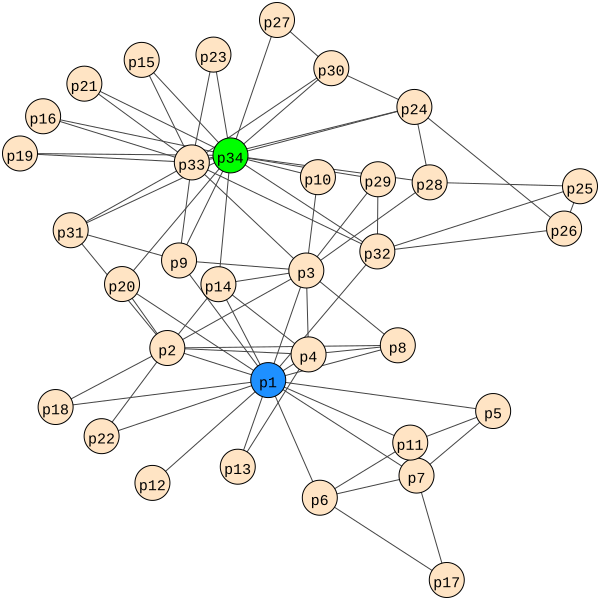

In [ ]:
obj = igraph.plot(g,vertex_label_color='black',vertex_label_size=15,vertex_size=35)
obj

In [ ]:
print(g.get_all_shortest_paths('p1','p34'))

[[0, 31, 33], [0, 19, 33], [0, 13, 33], [0, 8, 33]]


In [ ]:
for v in g.get_all_shortest_paths('p1','p34'):
    g.vs[v[1]]['color'] = '#ffa07a'

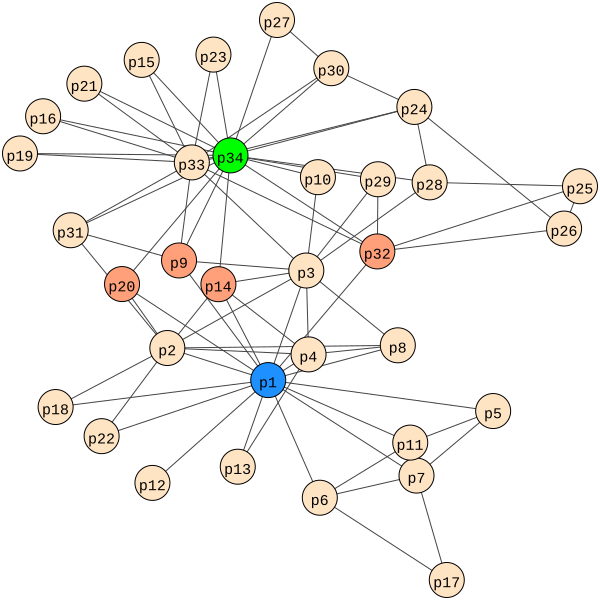

In [ ]:
obj = igraph.plot(g,vertex_label_color='black',vertex_label_size=15,vertex_size=35)
obj

In [ ]:
eb = g.edge_betweenness()
print(eb)

[14.166666666666664, 43.638888888888886, 11.5, 29.333333333333332, 43.83333333333333, 43.833333333333336, 12.80238095238095, 41.64841269841271, 29.333333333333332, 33.0, 26.099999999999994, 23.77063492063493, 22.509523809523813, 25.770634920634926, 22.50952380952381, 71.39285714285712, 13.033333333333335, 4.333333333333333, 4.164285714285714, 6.9595238095238106, 10.490476190476187, 8.209523809523809, 10.490476190476187, 18.10952380952381, 12.583333333333332, 14.145238095238092, 5.147619047619047, 17.28095238095238, 4.28095238095238, 23.10873015873016, 12.780952380952376, 38.70158730158729, 1.8880952380952383, 6.899999999999997, 8.37142857142857, 2.6666666666666665, 1.6666666666666665, 1.6666666666666667, 2.6666666666666665, 16.5, 16.5, 5.5, 17.077777777777776, 22.684920634920633, 16.614285714285714, 38.04920634920634, 13.511111111111113, 19.488888888888887, 13.511111111111113, 19.488888888888887, 13.511111111111113, 19.488888888888887, 33.31349206349207, 13.511111111111113, 19.48888888

In [ ]:
import numpy
ebn = numpy.array(eb)
print(ebn)


[14.16666667 43.63888889 11.5        29.33333333 43.83333333 43.83333333
 12.80238095 41.6484127  29.33333333 33.         26.1        23.77063492
 22.50952381 25.77063492 22.50952381 71.39285714 13.03333333  4.33333333
  4.16428571  6.95952381 10.49047619  8.20952381 10.49047619 18.10952381
 12.58333333 14.1452381   5.14761905 17.28095238  4.28095238 23.10873016
 12.78095238 38.7015873   1.88809524  6.9         8.37142857  2.66666667
  1.66666667  1.66666667  2.66666667 16.5        16.5         5.5
 17.07777778 22.68492063 16.61428571 38.04920635 13.51111111 19.48888889
 13.51111111 19.48888889 13.51111111 19.48888889 33.31349206 13.51111111
 19.48888889 13.51111111 19.48888889 11.09444444  5.91111111  3.73333333
 12.53333333 18.32777778  2.36666667 10.46666667 22.5        23.59444444
  2.54285714 30.45714286 17.09761905  8.33333333 13.78095238 13.08730159
 16.72222222  9.56666667 15.04285714 23.24444444 29.95396825  4.61428571]


In [ ]:
iebn = numpy.argmax(ebn)
print(iebn)

15


In [ ]:
g.vs['color'] = '#ffe4c4'
g.vs[0]['color'] = '#1e90ff'
g.vs[33]['color'] = 'green'
g.es['width'] = 1
g.es[iebn]['width'] = 4

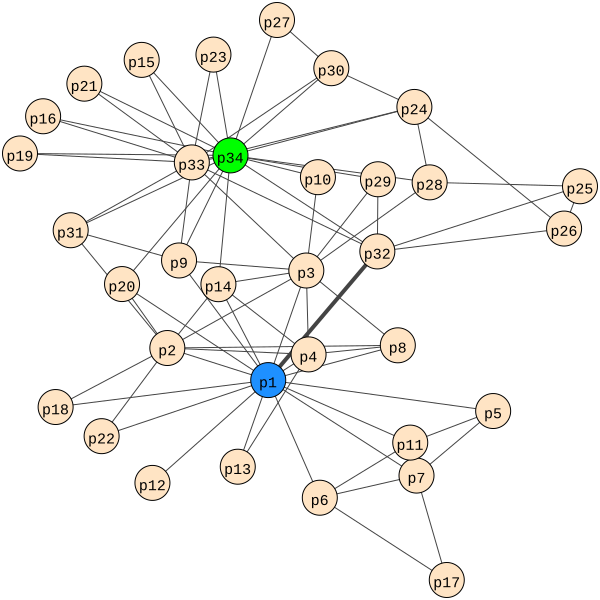

In [ ]:
obj = igraph.plot(g,vertex_label_color='black',vertex_label_size=15,vertex_size=35)
obj

In [ ]:

res = g.community_edge_betweenness(directed=False)




In [ ]:
print(res.optimal_count)

5


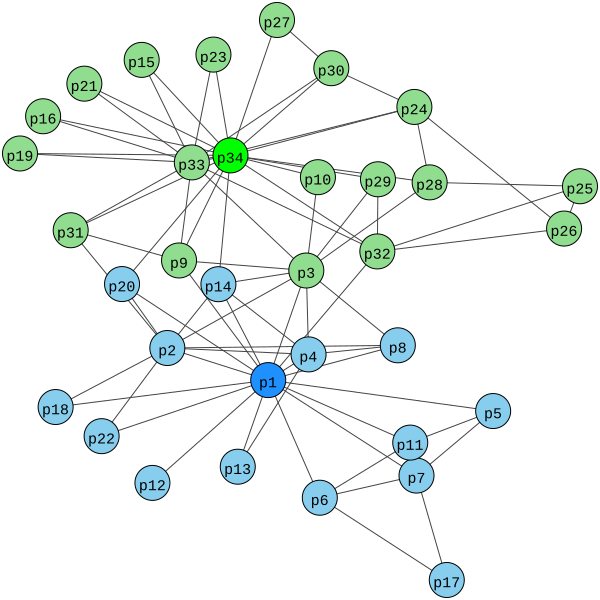

In [ ]:
res = igraph.plot(g,vertex_label_color='black',vertex_label_size=15,vertex_size=35)
res

In [ ]:
sol = res.as_clustering(n=2)
print(sol)

Clustering with 34 elements and 2 clusters
[0] p1, p2, p4, p5, p6, p7, p8, p11, p12, p13, p14, p17, p18, p20, p22
[1] p3, p9, p10, p15, p16, p19, p21, p23, p24, p25, p26, p27, p28, p29, p30,
    p31, p32, p33, p34


In [ ]:
g.vs[sol[0]]['color'] = '#87ceee'
g.vs[0]['color'] = '#1e90ff'
g.vs[sol[1]]['color'] = '#90dd90'
g.vs[33]['color'] = 'green'
g.es['width'] = 1

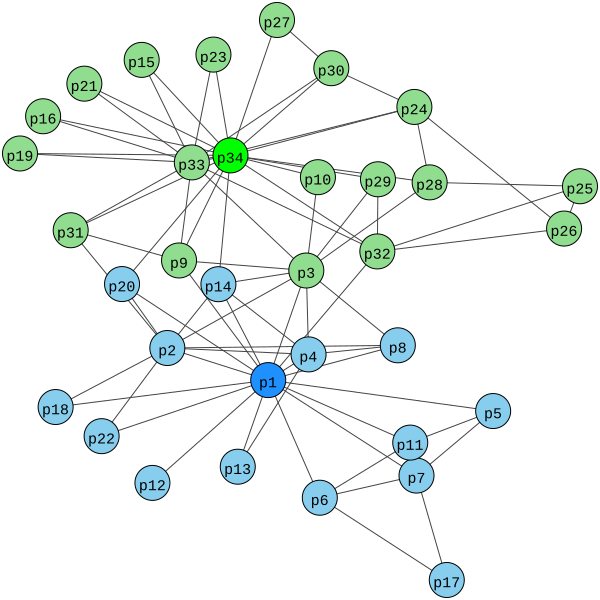

In [ ]:
obj = igraph.plot(g,vertex_label_color='black',vertex_label_size=15,vertex_size=35)
obj